In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('preprocessed_data.csv')

In [25]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,1208.518696,1.072021e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,307780.0,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,1202.671085,1.493858e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0


In [61]:
cor=df.corr()
cor['Loan Status']

Loan Status                     1.000000
Current Loan Amount            -0.061181
Credit Score                   -0.398523
Annual Income                   0.049561
Monthly Debt                   -0.016292
Years of Credit History         0.035513
Months since last delinquent    0.005249
Number of Open Accounts        -0.015460
Number of Credit Problems      -0.011712
Current Credit Balance          0.009451
Maximum Open Credit             0.010934
Bankruptcies                    0.000016
Tax Liens                      -0.014861
Name: Loan Status, dtype: float64

In [26]:
Xy = df.copy()
del Xy['Loan ID']
del Xy['Customer ID']
del Xy['Loan Status']

In [33]:
Xy=pd.get_dummies(Xy,drop_first=True)

In [50]:
X=Xy

df['Loan Status']=df['Loan Status'].map(lambda x: True if x=='Fully Paid' else False)
y=df[['Loan Status']]

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=50)

In [85]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [86]:
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
gradient = GradientBoostingClassifier()
ada = AdaBoostClassifier()
bagging = BaggingClassifier()
knn = KNeighborsClassifier(n_neighbors=20)

In [88]:
t = tree.fit(X_train, y_train)
f = forest.fit(X_train, y_train)
g = gradient.fit(X_train, y_train)
a = ada.fit(X_train, y_train)
b = bagging.fit(X_train, y_train)
knn = knn.fit(X_train, y_train)

<ipython-input-88-c2b31ae2ea77>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  f = forest.fit(X_train, y_train)
c:\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\python38\lib\site-packages\sklearn

In [89]:
print ('DecisionTreeClassifier:',(t.score(X_test, y_test)))
print('RandomForestClassifier:',(f.score(X_test, y_test)))
print ('GradientBoostingClassifier:',(g.score(X_test, y_test)))
print ('AdaBoostClassifier:',(a.score(X_test, y_test)))
print ('BaggingClassifier:',(b.score(X_test, y_test)))
print ('KNeighborsClassifier:',(knn.score(X_test, y_test)))

DecisionTreeClassifier: 0.6957317073170731
RandomForestClassifier: 0.7797560975609756
GradientBoostingClassifier: 0.7803658536585366
AdaBoostClassifier: 0.7778048780487805
BaggingClassifier: 0.7411585365853659
KNeighborsClassifier: 0.7042073170731707


In [125]:
xxx = pd.DataFrame(X_test.iloc[4]).transpose()

In [127]:
res = g.predict(xxx)[0]

In [128]:
res

False

In [133]:
g.predict_proba(xxx)[0]

array([0.98602522, 0.01397478])

In [134]:
res = g.predict(xxx)[0]
if res:
    print(f'ДА    вероятность: {g.predict_proba(xxx)[0][1] * 100}%')
else:
    print(f'НЕТ   вероятность: {g.predict_proba(xxx)[0][0] * 100}%')

НЕТ   вероятность: 98.602521805459%


## какие признаки важны для прогнозирования

<AxesSubplot:ylabel='feature'>

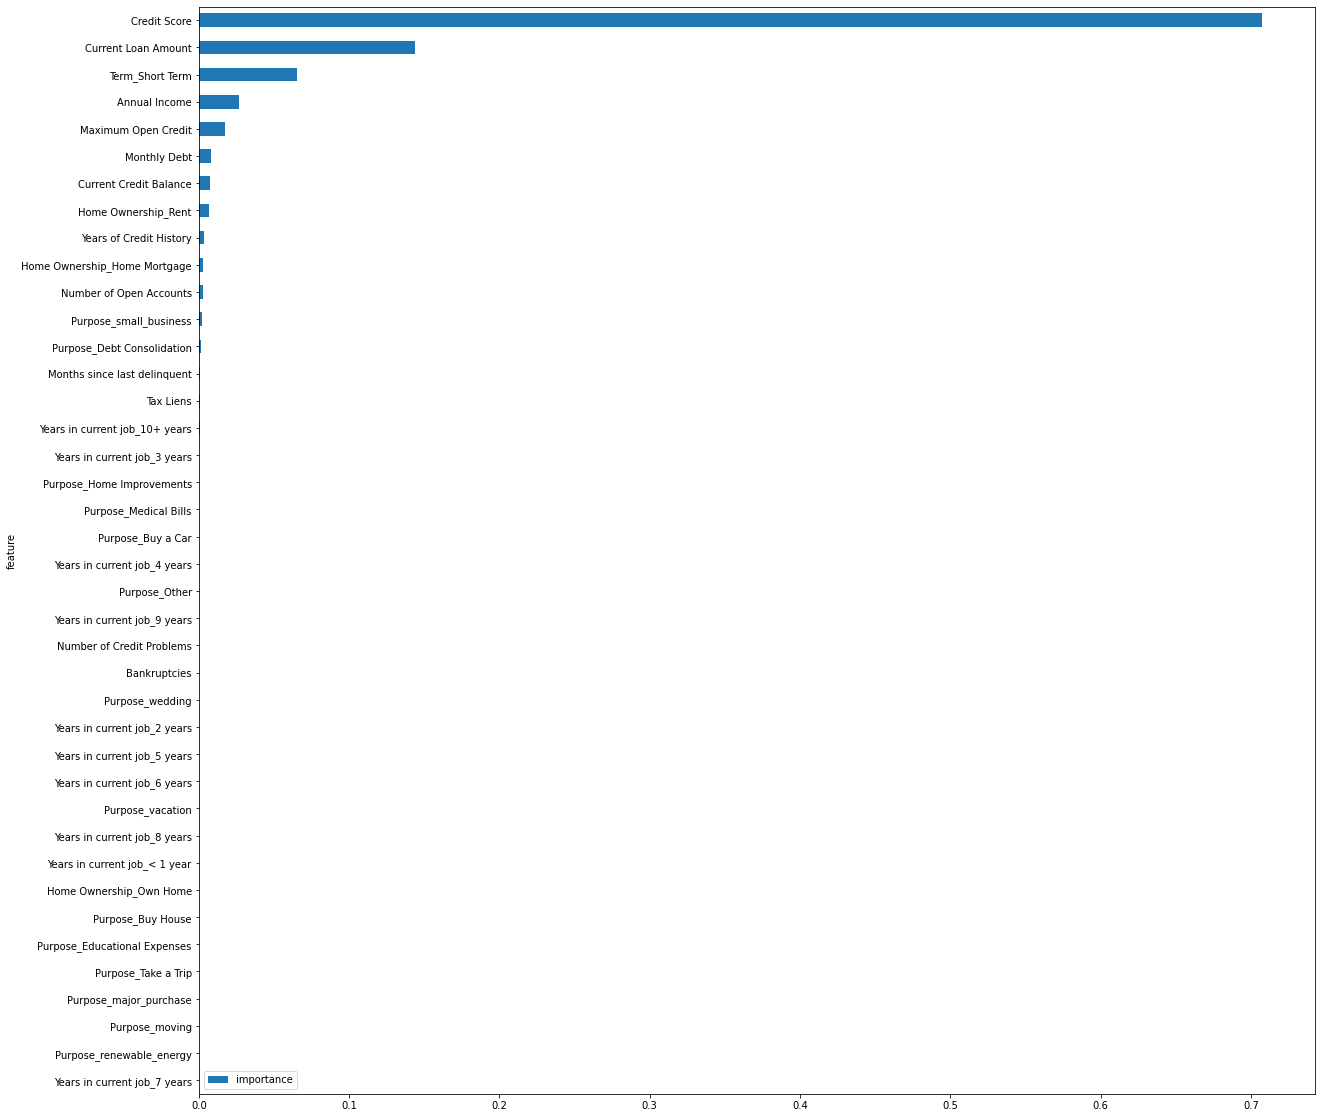

In [139]:
features = pd.DataFrame()
features[ 'feature' ] = Xy.columns
features['importance'] = g.feature_importances_
features.sort_values(by=['importance'], ascending=True,inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20,20))